In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
votes = pd.read_csv('house-votes-84.csv', header=None, names=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
print(votes.head())
votes_binary = votes.copy()
for col in votes.columns[1:]:
    votes_binary[col] = votes[col].map({'y': 1, 'n': 0, '?': np.nan})
print(votes_binary.info())
votes_binary.loc[0, 'synfuels'] = 0.0
votes_imputed = votes_binary.ffill()
print(votes_imputed)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null float64
water                387 non-null float64
budget               424 non-null float64
physician            424 non-null float64
salvador             420 non-null float64
religious            424 non-null float64
satellite            421 non-null float64
aid                  420 non-null float64
missile              413 non-null float64
immigration          428 non-null float64
synfuels             414 non-null float64
education            404 non-null float64
superfund            410 non-null float64
crime                418 non-null float64
duty_free_exports    407 non-null float64
eaa_rsa              331 non-null float64
dtypes: float64(16), object(1)
memory usage: 57.9+ KB


In [40]:
y = votes_imputed.party.values
X = votes_imputed.drop('party', axis=1).values

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
y_pred = knn.predict(X)
X_new = pd.DataFrame(
    np.array([[ 0.69646919,  0.28613933,  0.22685145,  0.55131477,  0.71946897,
         0.42310646,  0.9807642 ,  0.68482974,  0.4809319 ,  0.39211752,
         0.34317802,  0.72904971,  0.43857224,  0.0596779 ,  0.39804426,
         0.73799541]]))
knn.predict(X_new)

array(['democrat'], dtype=object)

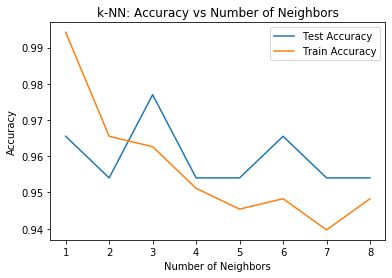

In [44]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN: Accuracy vs Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [22]:
from sklearn import datasets

digits = datasets.load_digits()

In [24]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [26]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [27]:
digits.images.shape

(1797, 8, 8)

In [28]:
digits.data.shape

(1797, 64)

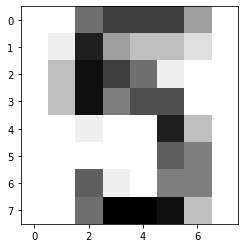

In [29]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [49]:
X = digits.data
y = digits.target

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [51]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9833333333333333


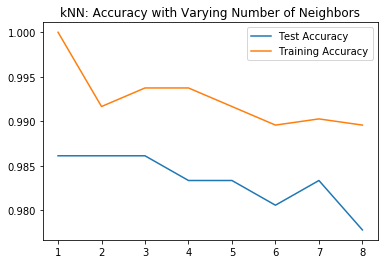

In [52]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('kNN: Accuracy with Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()

In [77]:
gap = pd.read_csv('gm_2008_region.csv')
print(gap.info())
print(gap.columns)
X = gap['fertility']
y = gap['life']
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB
None
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')
(139,)
(139,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [70]:
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(139, 1)
(139, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


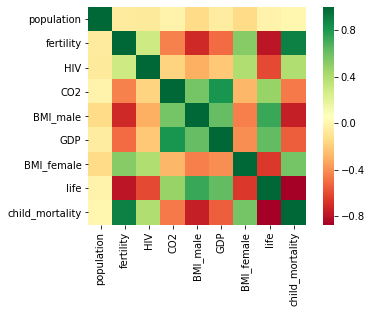

In [71]:
import seaborn as sns

sns.heatmap(gap.corr(), square=True, cmap='RdYlGn')

0.6192442167740035


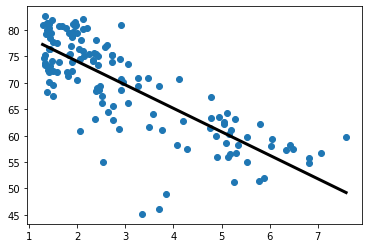

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
pred_space = np.linspace(min(X), max(X)).reshape(-1, 1)
lin_reg.fit(X, y)
y_pred = lin_reg.predict(pred_space)
print(lin_reg.score(X, y))
plt.scatter(X, y)
plt.plot(pred_space, y_pred, color='black', linewidth=3)
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [78]:
X = gap.drop(['life', 'Region'], axis='columns')
y = gap.life
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
print(X.shape)
print(y.shape)

(139, 8)
(139,)


In [79]:
mullin_reg = LinearRegression()
mullin_reg.fit(X_train, y_train)
y_pred = mullin_reg.predict(X_test)
print('R^2: {}'.format(mullin_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {}'.format(rmse))

R^2: 0.8380468731430133
RMSE: 3.2476010800369477


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
cvscores = cross_val_score(lr, X, y, cv=5)

print(cvscores)
print(np.mean(cvscores))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
0.859962772279345


In [83]:
for cv in np.arange(2, 11):
    cvscores = cross_val_score(lr, X, y, cv=cv)
    print(cv, np.mean(cvscores))

2 0.8464662121126033
3 0.8718712782622262
4 0.8730246919338989
5 0.859962772279345
6 0.8662794235505737
7 0.8466169980423001
8 0.8499168379008621
9 0.846838023222173
10 0.8436128620131267


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


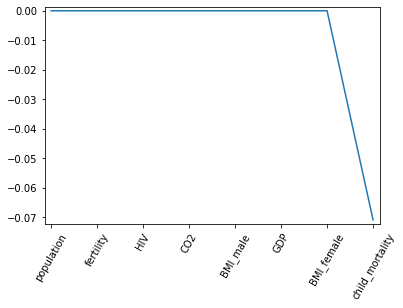

In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X, y)
print(lasso.coef_)
df = gap.drop(['life', 'Region'], axis='columns')
plt.plot(range(len(df.columns)), lasso.coef_)
plt.xticks(range(len(df.columns)), df.columns, rotation=60)
plt.margins(0.02)
plt.show()

In [89]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

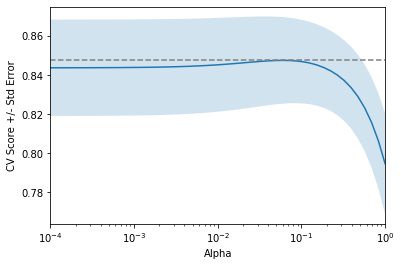

In [90]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge=Ridge(normalize=True)
for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))
display_plot(ridge_scores, ridge_scores_std)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

diabetes = pd.read_csv('diabetes.csv')
y = diabetes.diabetes
X = diabetes.drop(['diabetes'], axis='columns').values
print(y.shape)
print(X.shape)
print(type(y))
print(type(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(768,)
(768, 8)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

diabetes = pd.read_csv('diabetes.csv')
y = diabetes.diabetes
X = diabetes.drop('diabetes', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=42, stratify=y)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[173  28]
 [ 52  55]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       201
           1       0.66      0.51      0.58       107

    accuracy                           0.74       308
   macro avg       0.72      0.69      0.70       308
weighted avg       0.73      0.74      0.73       308



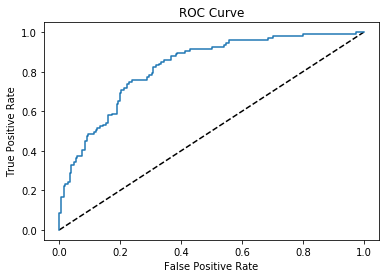

In [112]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print('AUC scores computed using 5-fold cross_validation: {}'.format(cv_auc))

AUC: 0.8150369647091645
AUC scores computed using 5-fold cross_validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
logreg = LogisticRegression(solver='liblinear')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)
print('Tuned Logistic Regression Parameters: {}'. format(logreg_cv.best_params_))
print('Best score is {}.'.format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334.


In [121]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'max_depth': [3, None], 
              'max_features': randint(1, 9), 
              'min_samples_leaf': randint(1, 9),
              'criterion': ['gini', 'entropy']
             }
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)
print('Tuned Decision Tree Parameters: {}'.format(tree_cv.best_params_))
print('Best score is {}'.format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 8}
Best score is 0.7526041666666666


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg = LogisticRegression(solver='liblinear')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=42, stratify=y)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
print('Tuned Logistic Regression Parameters: {}'.format(logreg_cv.best_params_))
print('Tuned Logistic Regression Accuracy: {}'.format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7913043478260869


In [133]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=42, stratify=y)
l1_space =np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}
elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train, y_train)
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.547391386796416, tolerance: 0.008317119565217393
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.152257314111036, tolerance: 0.008436684782608696
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.09309483454035, tolerance: 0.008520652173913044
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.26791611123748194
Tuned ElasticNet MSE: 0.1659736907110756


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.28147117497615, tolerance: 0.010465
  positive)


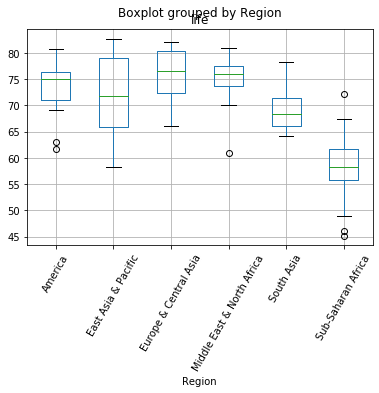

In [135]:
import pandas as pd

gap = pd.read_csv('gm_2008_region.csv')
gap.boxplot('life', 'Region', rot=60)
plt.show()

In [141]:
gap_region = pd.get_dummies(gap)
gap_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [142]:
gap_region = pd.get_dummies(gap, drop_first=True)
gap_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [143]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=0.5, normalize=True)
ridge_cv = cross_val_score(ridge, X, y, cv=5)
ridge_cv

array([0.26648172, 0.23084647, 0.27355543, 0.24898795, 0.25673452])

In [145]:
votes = pd.read_csv('house-votes-84.csv', header=None, names=['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])
print(votes.head())
votes_binary = votes.copy()
for col in votes.columns[1:]:
    votes_binary[col] = votes[col].map({'y': 1, 'n': 0, '?': np.nan})
print(votes_binary.info())
votes_binary.loc[0, 'synfuels'] = 0.0
votes_imputed = votes_binary.ffill()
print(votes_imputed.head())

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1  republican       n     y      n         y        y         y         n   n   
2    democrat       ?     y      y         ?        y         y         n   n   
3    democrat       n     y      y         n        ?         y         n   n   
4    democrat       y     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           y        ?         y         y     y                 n   
1       n           n        n         y         y     y                 n   
2       n           n        y         n         y     y                 n   
3       n           n        y         n         y     n                 n   
4       n           n        y         ?         y     y                 y   

  eaa_rsa  
0       y  
1       ?  
2       

In [146]:
votes[votes == '?'] = np.nan
print(votes.isnull().sum())

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64


In [156]:
votes

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,NaN,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,NaN,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,NaN,NaN


In [147]:
votes.shape

(435, 17)

In [149]:
votes.dropna().shape

(232, 17)

In [155]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')
clf = SVC()
steps = [('imputation', imp), ('SVM', clf)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(votes.drop('party', axis=1), 
                                                    votes.party, test_size=0.3, 
                                                    random_state=42, stratify=y)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
classification_report(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [435, 768]